# K-MEANS 구현

In [25]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Cluster마다 최소 거리를 return하는 centroid 찾기
각 점이 할당될 중심점을 계산

In [26]:
def assign(point, centroids, k):
    return min(range(k), key=lambda i: np.dot(centroids[i]-point, centroids[i]-point))

## Compute centroids
새로운 centroid 계산

In [27]:
def compute_centroids(assignments, points, k):
    vec_sum = [np.zeros(len(points[0])) for _ in range(k)]
    counts = [0] * k

    for i, p in zip(assignments, points):
        vec_sum[i] += p
        counts[i] += 1

    return [vec_sum[i]/counts[i] if counts[i] > 0 else random.choice(points) for i in range(k)]

## K-Means
1. 데이터 중에서 임의로 k개의 점을 중심점으로 선택 (Forgy)
2. 각 점이 할당돨 중심점을 계산(assign)
3. 새로운 centroid 계산(compute centroid)
4. 클러스터에 변화가 없을 경우 종료

In [28]:
def kmeans(k, points):
    prev_assignment = []

    centroids = points[np.random.choice(points.shape[0], replace=False, size=k)]

    for epoch in range(10):
        
        assignment = [assign(p, centroids, k) for p in points]

        centroids = compute_centroids(assignment, points, k)

        if prev_assignment == assignment:
            break
        prev_assignment = assignment
    
    return assignment, centroids

## Test

### 데이터 생성

In [29]:
k = 3

points = [np.random.randn(k) for _ in range(80)]
points

[array([-0.65669945, -0.89291482, -0.09165774]),
 array([ 0.77030488,  0.06075747, -0.57215281]),
 array([-2.08172117,  0.18107057,  0.10487199]),
 array([-0.8423434 ,  0.6216313 ,  0.53133796]),
 array([-0.85849022,  1.21844463,  0.31600544]),
 array([1.1484184 , 1.02184408, 1.44135408]),
 array([ 0.38820613,  0.65996426, -1.11492713]),
 array([ 0.37016806,  0.31284875, -1.70860212]),
 array([-0.50030175, -1.17644097, -1.83708622]),
 array([-1.46421967,  0.07395875, -0.11453483]),
 array([ 0.67679106, -0.95420607,  0.09585047]),
 array([-0.24515297, -0.43322412,  0.55580945]),
 array([ 0.15740484,  0.39235457, -0.71447215]),
 array([1.42908576, 0.55328654, 1.79185262]),
 array([ 0.45508806, -1.09147762, -0.06716491]),
 array([ 0.47068536,  0.40531371, -1.19102228]),
 array([ 0.59170731, -1.07972524, -0.74173593]),
 array([-1.42874582, -0.90196902,  0.26696446]),
 array([-0.39268762,  0.21474232,  0.240631  ]),
 array([0.660346  , 0.02298204, 0.87839887]),
 array([ 1.03145074,  0.15427

In [30]:
points.extend([np.random.randn(k) + np.array([5, 5, 5]) for _ in range(20)])
points.extend([np.random.randn(k) + np.array([10, 5, 0]) for _ in range(20)])
points = np.array(points)
points

array([[-6.56699446e-01, -8.92914818e-01, -9.16577442e-02],
       [ 7.70304883e-01,  6.07574717e-02, -5.72152815e-01],
       [-2.08172117e+00,  1.81070572e-01,  1.04871991e-01],
       [-8.42343398e-01,  6.21631303e-01,  5.31337963e-01],
       [-8.58490221e-01,  1.21844463e+00,  3.16005438e-01],
       [ 1.14841840e+00,  1.02184408e+00,  1.44135408e+00],
       [ 3.88206130e-01,  6.59964256e-01, -1.11492713e+00],
       [ 3.70168061e-01,  3.12848746e-01, -1.70860212e+00],
       [-5.00301754e-01, -1.17644097e+00, -1.83708622e+00],
       [-1.46421967e+00,  7.39587516e-02, -1.14534835e-01],
       [ 6.76791057e-01, -9.54206075e-01,  9.58504694e-02],
       [-2.45152966e-01, -4.33224124e-01,  5.55809454e-01],
       [ 1.57404842e-01,  3.92354571e-01, -7.14472151e-01],
       [ 1.42908576e+00,  5.53286542e-01,  1.79185262e+00],
       [ 4.55088057e-01, -1.09147762e+00, -6.71649084e-02],
       [ 4.70685364e-01,  4.05313714e-01, -1.19102228e+00],
       [ 5.91707309e-01, -1.07972524e+00

### kmeans 실행

In [31]:
assignments, centroids = kmeans(k, points)
print(assignments)
print(centroids)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[array([5.20087438, 4.82669923, 4.89133612]), array([9.66541792, 4.86756079, 0.0560682 ]), array([ 0.10839696, -0.10444904, -0.01103748])]


### 결과 확인

/tmp/ipykernel_9763/3498376421.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


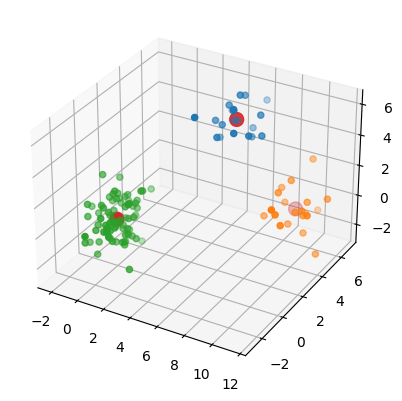

In [32]:
fig = plt.figure()
ax = fig.gca(projection='3d')

clusters = [[] for _ in range(k)]
for a, p in zip(assignments, points):
    clusters[a].append(p)


for cluster in clusters:
    ax.scatter(*zip(*cluster))

ax.scatter(*zip(*centroids), s=100)
plt.show()

# 이미지 처리 응용

## 사진 불러오기

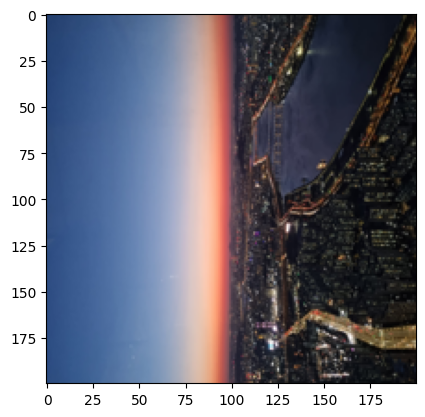

In [33]:
from PIL import Image

im = Image.open("20220327_191921.jpg")

width = 200
height = im.height * width // im.width
im = im.resize((width, height))

plt.imshow(im)
plt.show()

## K-MEANS 적용, 결과 확인
1. 데이터 준비, 알고리즘 적용
2. 모든 픽셀의 색을, centroid 중 하나로 선택
3. 바뀐 그림 출력

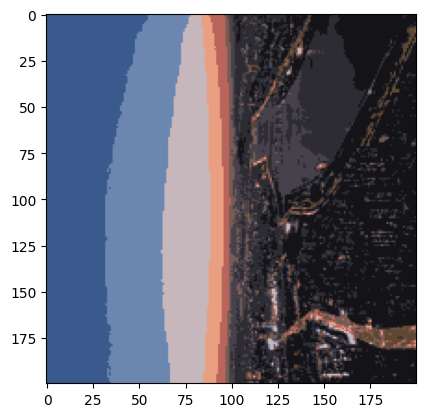

In [34]:
pixels = np.array(im).reshape(-1, 3)
assignments, centroids = kmeans(10, pixels)

for a, i in zip(assignments, range(pixels.shape[0])):
    pixels[i] = centroids[a]

im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB')
plt.imshow(im_remastered)
plt.show()

# Sklearn
1. label_: 각 점이 할당된 cluster 번호
2. cluster_centers_: cluster 별 중심점 좌표

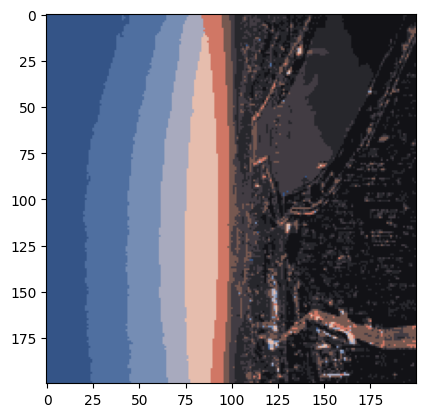

In [36]:
from sklearn.cluster import KMeans

pixels = np.array(im).reshape(-1, 3)

kmeans = KMeans(n_clusters=10)
kmeans.fit(pixels)

for a, i in zip(kmeans.labels_, range(pixels.shape[0])):
    pixels[i] = kmeans.cluster_centers_[a]

im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB')
plt.imshow(im_remastered)
plt.show()